# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [24]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [25]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
import mglearn
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'])
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
tree = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
tree_score = cross_validate(tree, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)

forest = RandomForestRegressor(max_depth = 5, random_state=0).fit(X_train, y_train)
forest_score = cross_validate(forest, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)

gbrt = GradientBoostingRegressor(max_depth = 5, random_state=0).fit(X_train, y_train)
gbrt_score = cross_validate(gbrt, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)

results.loc['DT'] = [(np.average(tree_score['train_score']))*(-1), (np.average(tree_score['test_score']))*(-1)]

results.loc['RF'] = [(np.average(forest_score['train_score']))*(-1), (np.average(forest_score['test_score']))*(-1)]

results.loc['GB'] = [(np.average(gbrt_score['train_score']))*(-1), (np.average(gbrt_score['test_score']))*(-1)]
print(results)

    Training Accuracy  Validation Accuracy
DT          47.279761            73.447331
RF          29.577455            45.059351
GB           3.379440            22.783221


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [26]:
# TO DO: ADD YOUR CODE HERE
tree_score = cross_validate(tree, X_train, y_train, scoring='r2', return_train_score=True)
forest_score = cross_validate(forest, X_train, y_train, scoring='r2', return_train_score=True)
gbrt_score = cross_validate(gbrt, X_train, y_train, scoring='r2', return_train_score=True)

results.loc['DT'] = [(np.average(tree_score['train_score'])), (np.average(tree_score['test_score']))]
results.loc['RF'] = [(np.average(forest_score['train_score'])), (np.average(forest_score['test_score']))]
results.loc['GB'] = [(np.average(gbrt_score['train_score'])), (np.average(gbrt_score['test_score']))]

print(results)

    Training Accuracy  Validation Accuracy
DT           0.834465             0.738697
RF           0.896557             0.840927
GB           0.988171             0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*
1. Overall the results ising these non-linear methods are better, the MSE values are lower (3-47 for training, and 22-73 for validation) versus the 111 for training and 95 for validation I got in assignment 2. The R2 values were also better (closer to 1) with values of 0.83-0.99 for training, and 0.74-0.92 for validation, compared to 0.61 for training and 0.62 for validation from assignment 2.
2. For this dataset I would use the Gradient Boosting model as it has the lowest mean squared error, and the highest R2 value. A validation r2 score of 0.92 is quite good for a model.
3. For the tree based models we could adjust the depth of the trees, and the number of trees.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced my code from the class examples, and from the scikit-lean.org website.
2. I completed all of the steps in numerical order.
3. I did not use any AI tools for this process.
4. No issues, just took some time to determine the proper syntax for the MSE and r2 calculations. The sklearn website was useful for that. Also had some confusion with the cross-validation as discussed in class, but was clarified with the D2L post.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [37]:
# TO DO: Import wine dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
print("X size:", X.size)
print("X type", type(X))
print("y size:", y.size)
print("y type", type(y))

X size: 2314
X type <class 'pandas.core.frame.DataFrame'>
y size: 178
y type <class 'pandas.core.frame.DataFrame'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [38]:
# TO DO: ADD YOUR CODE HERE
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [39]:
# TO DO: ADD YOUR CODE HERE
X.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

How many samples do we have of each type of wine?

In [40]:
# TO DO: ADD YOUR CODE HERE
y.value_counts()

class
2        71
1        59
3        48
Name: count, dtype: int64

### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [43]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
import mglearn
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'])
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
tree = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X_train, y_train)
tree_score = cross_validate(tree, X_train, y_train.values.ravel(), scoring='accuracy', return_train_score=True)

svc = SVC(random_state=0).fit(X_train, y_train)
svc_score = cross_validate(svc, X_train, y_train.values.ravel(), scoring='accuracy', return_train_score=True)

results.loc['DTC'] = [(np.average(tree_score['train_score'])), (np.average(tree_score['test_score']))]
results.loc['SVC'] = [(np.average(svc_score['train_score'])), (np.average(svc_score['test_score']))]

print(results)

     Training Accuracy  Validation Accuracy
DTC           0.994357             0.894017
SVC           0.680427             0.676638


C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [44]:
# TO DO: Implement best model
"The method with the highest accuracy is the decision tree classifier"

'The method with the highest accuracy is the decision tree classifier'

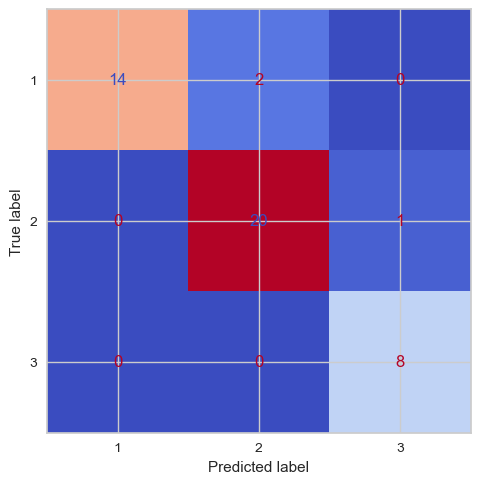

In [45]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, 
                                        tree.predict(X_val), 
                                        cmap='coolwarm',
                                        colorbar=False);

In [46]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, svc.predict(X_val)))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.85      0.81      0.83        21
           3       0.50      0.62      0.56         8

    accuracy                           0.82        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.84      0.82      0.83        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*
1. The training score and accuracy are both higher for the decision tree classifier (0.99, and 0.89 respectively). This is quite a bit better than the SVC scores of 0.68 and 0.68.
1. The SVC was using the default C parameter of 1.0, so with more or less regularization the model might fit better. The data itself might also follow more regular pattern where a tree-based model is the best for predicting outcomes.
1. Three (3) samples were incorrectly classified in step 3 with the tree-based model.
1. In this case precision is more important as we want to correctly classify the wine, and keep the standards high. If there are false negatives it might affect the producer, but doesn't hurt the consumer.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced my code from the example notebooks for this class
1. I completed the steps in numerical order.
1. I did not use any AI for this assignment.
1. I did not have any serious challenges, but I did need to review precision vs recall.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*
Through the class and examples I've seen that real-life situations are often not linear and need to be modeled by more complex systems. The concrete example from assignment 2 and 3 shows that validation accuracy improves drastically going from a linear model to a gradient boosted model (0.62 to 0.92 r2 value).

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
I liked using the new non-linear models and seeing how they modeled more real-life scenarios.
I find some of the data summary and analysis aspect challenging.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [51]:
# TO DO: ADD YOUR CODE HERE
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'])

from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=5000, random_state=0).fit(X_train, y_train)
svc_score = cross_validate(linear_svm, X_train, y_train, scoring='accuracy', return_train_score=True)

results.loc['Linear SVC'] = [(np.average(svc_score['train_score'])), (np.average(svc_test_score['test_score']))]

print(results)

C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\

            Training Accuracy  Validation Accuracy
Linear SVC           0.868295                  0.8


C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\benre\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*
The linear SVM model is higher than the SVC model from above, but still not as accurate as the decision tree classifier. The linear SVM model is alright for this dataset, but I would not suggest using it as more accurate models exist.